## Load Libraries

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Dataset

In [2]:
# read car_ads.csv file
car = pd.read_csv('car_ads.csv')

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Info regarding dataset

In [3]:
#columns names
car.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [4]:
#check first 5 row
car.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [5]:
# column datatypes
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [6]:
# shape of data
car.shape

(3552912, 16)

In [7]:
#statistics of data
car.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


## Missing values and identification

In [8]:
#check null values
car.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

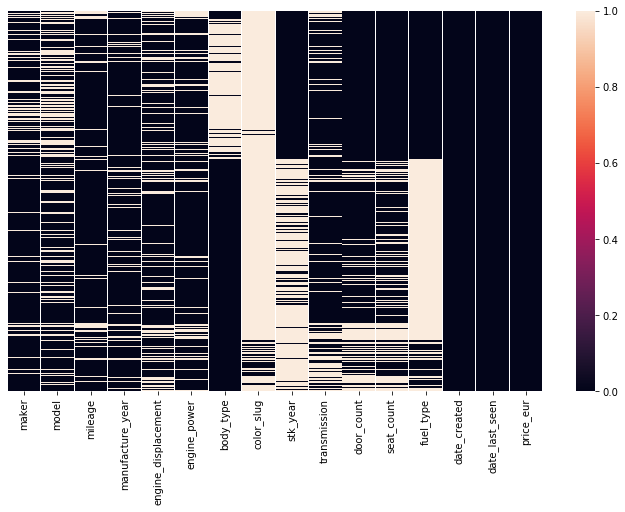

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(car.isnull(),yticklabels=False)

In [10]:
car.drop(['model','body_type','color_slug','stk_year','date_last_seen','date_created'],axis=1,inplace=True)

In [11]:
car.drop(car[(car.isnull().sum(axis=1)>3)==True].index, inplace=True)

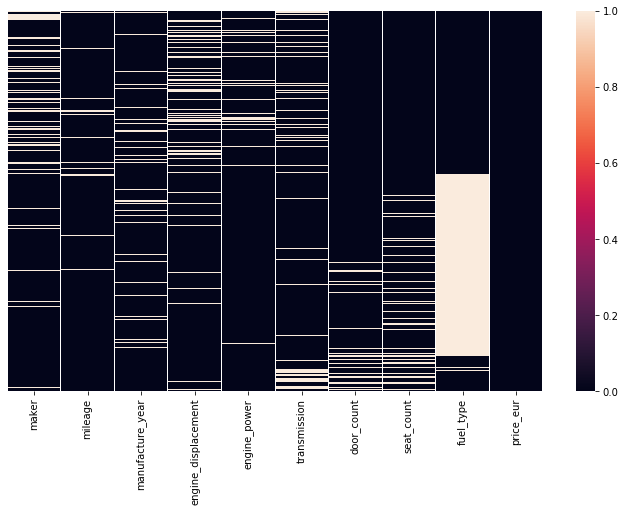

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(car.isnull(),yticklabels=False)

## Maker

In [13]:
print(car['maker'].unique())
print(car['maker'].nunique())

['ford' 'skoda' 'bmw' nan 'suzuki' 'nissan' 'opel' 'citroen' 'seat' 'kia'
 'audi' 'rover' 'toyota' 'hyundai' 'fiat' 'volvo' 'chevrolet' 'mazda'
 'jeep' 'mercedes-benz' 'subaru' 'chrysler' 'lancia' 'smart' 'honda'
 'porsche' 'dodge' 'mitsubishi' 'mini' 'jaguar' 'lexus' 'hummer' 'bentley'
 'tesla' 'maserati' 'isuzu' 'lamborghini' 'lotus' 'volkswagen' 'peugeot'
 'renault' 'alfa-romeo' 'infinity' 'rolls-royce' 'aston-martin'
 'land-rover' 'dacia']
46


In [14]:
car['maker'].value_counts()

volkswagen       242437
mercedes-benz    235188
skoda            234753
bmw              232228
audi             218759
ford             199992
opel             192936
fiat             110173
citroen           98289
renault           74580
hyundai           71360
peugeot           66682
toyota            65348
seat              63546
nissan            58005
volvo             43092
kia               42767
mazda             38007
mini              33743
smart             30866
suzuki            25291
mitsubishi        24090
porsche           23027
honda             21639
rover             18459
chevrolet         16993
jeep              14762
lancia            12282
jaguar             9018
subaru             8233
chrysler           6984
dodge              4390
lexus              3541
alfa-romeo         2859
maserati           1796
dacia              1411
land-rover         1341
bentley            1040
isuzu              1012
hummer              539
lamborghini         518
infinity        

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


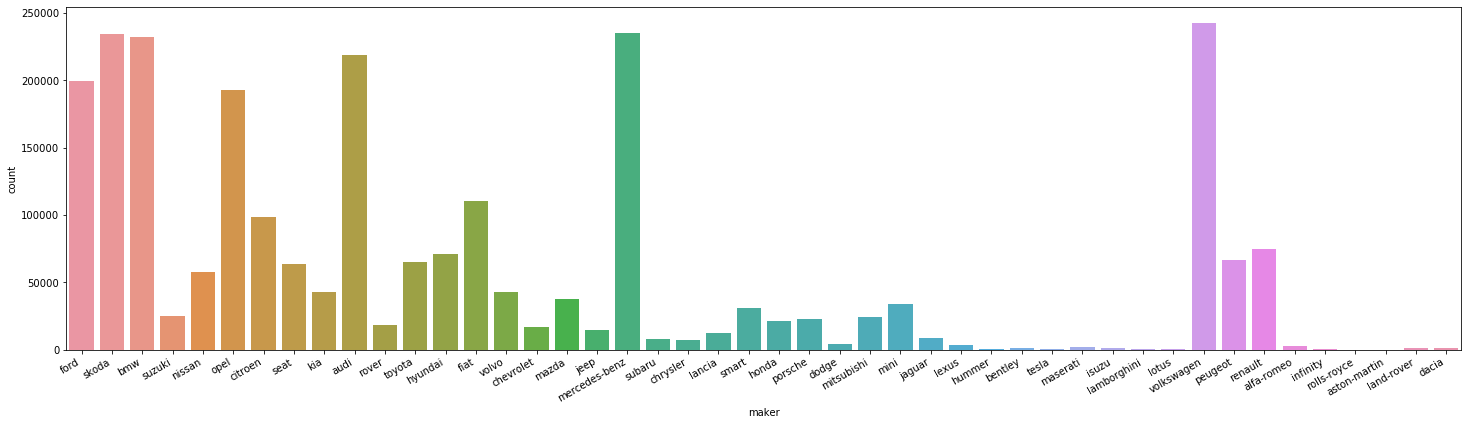

In [15]:
plt.figure(figsize=(25,7))
sns.countplot(car['maker'])
plt.gcf().autofmt_xdate()

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


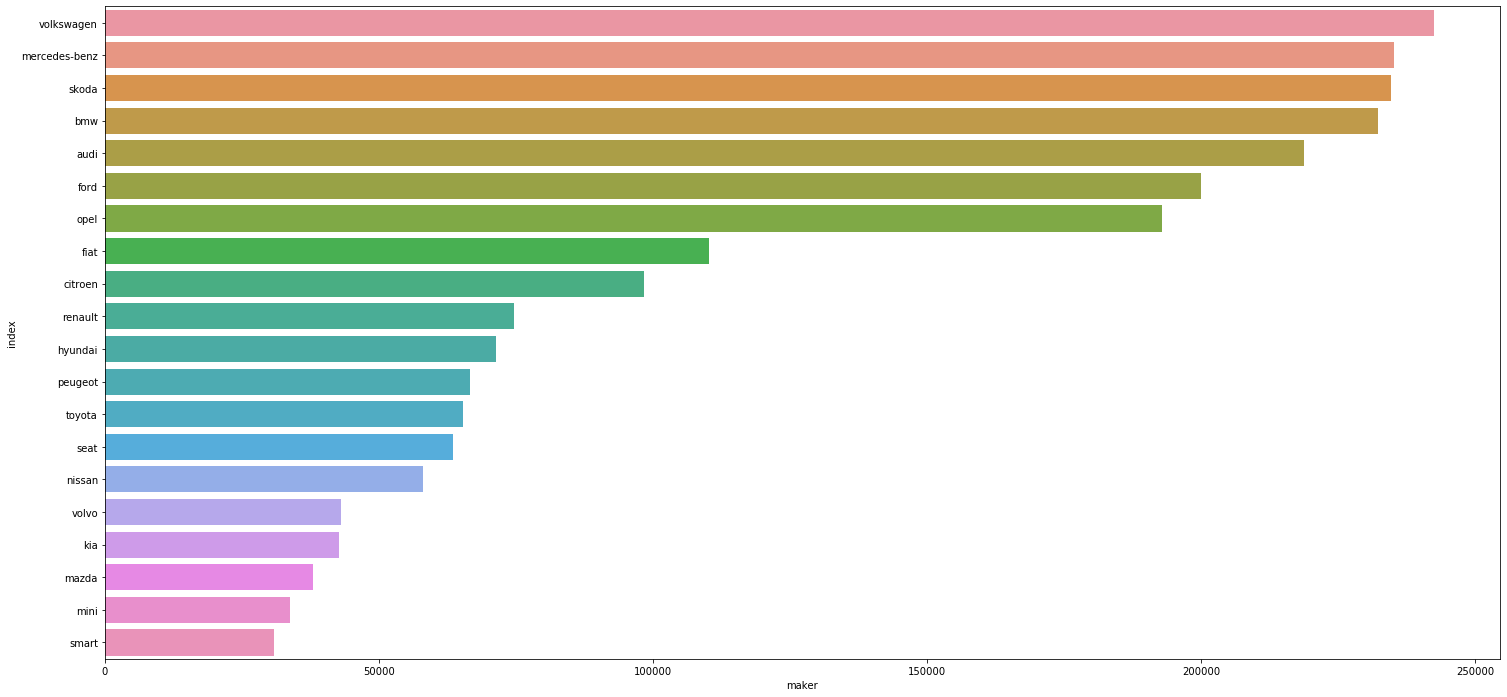

In [16]:
plt.figure(figsize=(25,12))
top_maker = car['maker'].value_counts().reset_index()[:20]
sns.barplot(top_maker['maker'],top_maker['index'])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


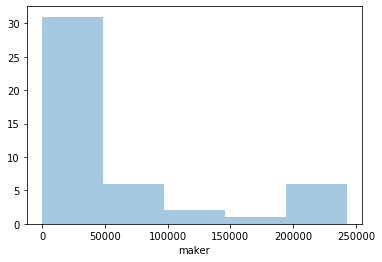

In [17]:
sns.distplot(car['maker'].value_counts(),kde=False,bins=5)

In [18]:
# replace nan with mode of maker
mode_maker = car['maker'].mode()[0]
car['maker'].replace(np.nan,mode_maker,inplace=True)

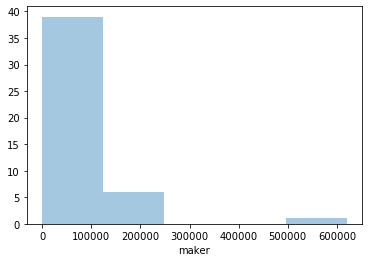

In [19]:
sns.distplot(car['maker'].value_counts(),kde=False,bins=5)

In [20]:
car['maker'].isnull().sum()

0

## Fuel type

In [21]:
car['fuel_type'].unique()

array(['diesel', 'gasoline', nan, 'lpg', 'cng', 'electric'], dtype=object)

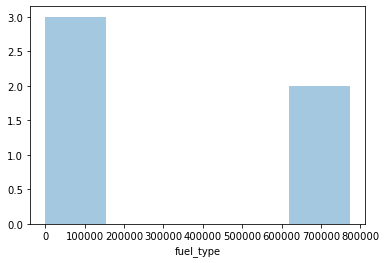

In [22]:
sns.distplot(car['fuel_type'].value_counts(),kde=False,bins=5)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


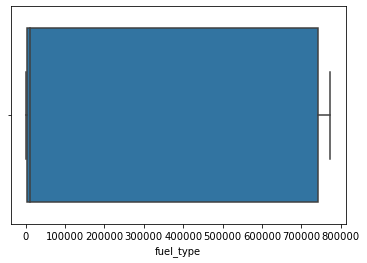

In [23]:
sns.boxplot(car['fuel_type'].value_counts())

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


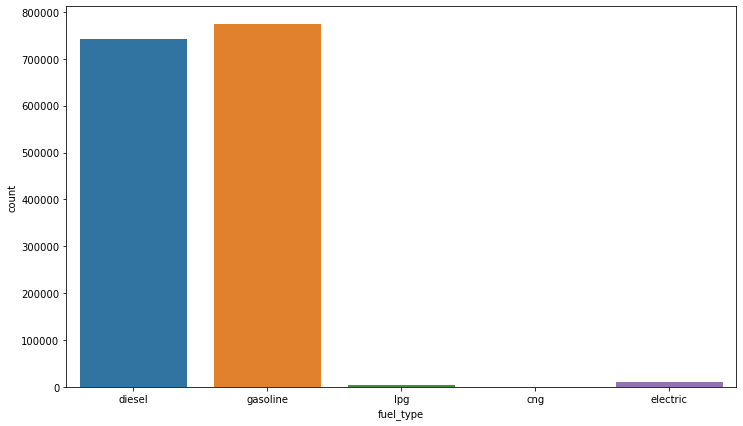

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(car['fuel_type'])

In [25]:
mode_fuel_type = car['fuel_type'].mode()[0]
car['fuel_type'].replace(np.nan,mode_fuel_type,inplace=True)

In [26]:
car['fuel_type'].isnull().sum()

0

## Transmission column

In [27]:
car['transmission'].unique()

array(['man', 'auto', nan], dtype=object)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


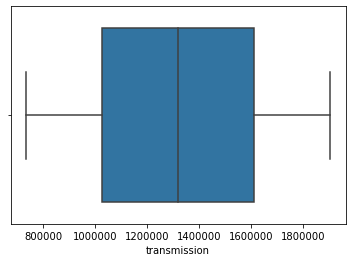

In [28]:
sns.boxplot(car['transmission'].value_counts())

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


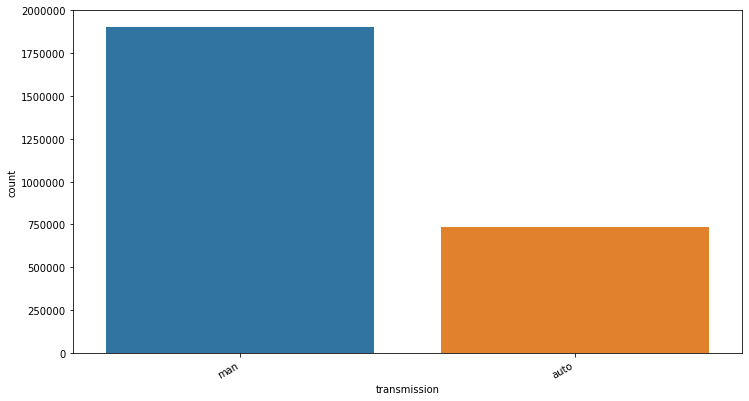

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(car['transmission'])
plt.gcf().autofmt_xdate()

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


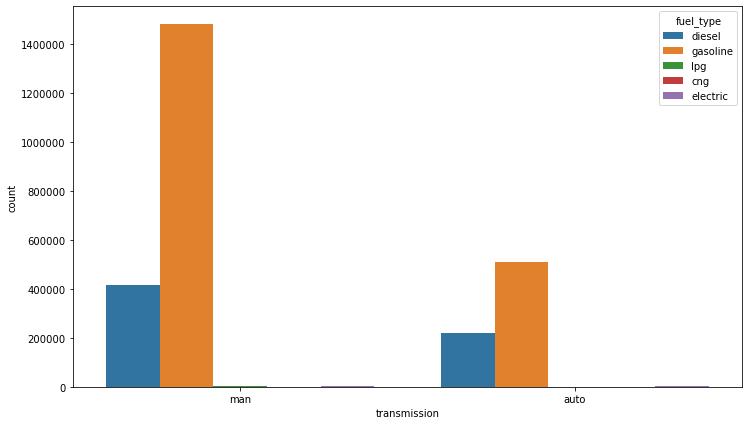

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(car['transmission'],hue=car['fuel_type'])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


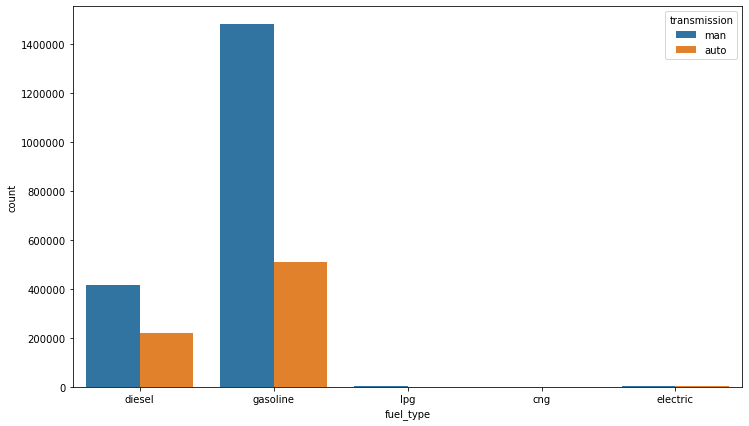

In [31]:
plt.figure(figsize=(12,7))
sns.countplot(car['fuel_type'],hue=car['transmission'])

In [32]:
mode_transmission = car['transmission'].mode()[0]
car['transmission'].replace(np.nan,mode_transmission,inplace=True)

In [33]:
car['transmission'].isnull().sum()

0

## Door count column

In [34]:
car['door_count'].unique()

array(['5', '3', '4', 'None', '2', '6', '1', '7', nan, 5.0, 4.0, 3.0, 2.0,
       6.0, 1.0, 9.0, 7.0, 8.0, 77.0, 54.0, 0.0, 55.0, 22.0, 45.0, 49.0,
       58.0], dtype=object)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


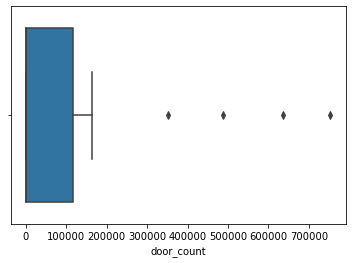

In [35]:
sns.boxplot(car['door_count'].value_counts())

In [36]:
car['door_count'].replace('None', np.nan, inplace=True)
car['door_count'] = car['door_count'].astype('float')

In [37]:
car['door_count'].unique()

array([ 5.,  3.,  4., nan,  2.,  6.,  1.,  7.,  9.,  8., 77., 54.,  0.,
       55., 22., 45., 49., 58.])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


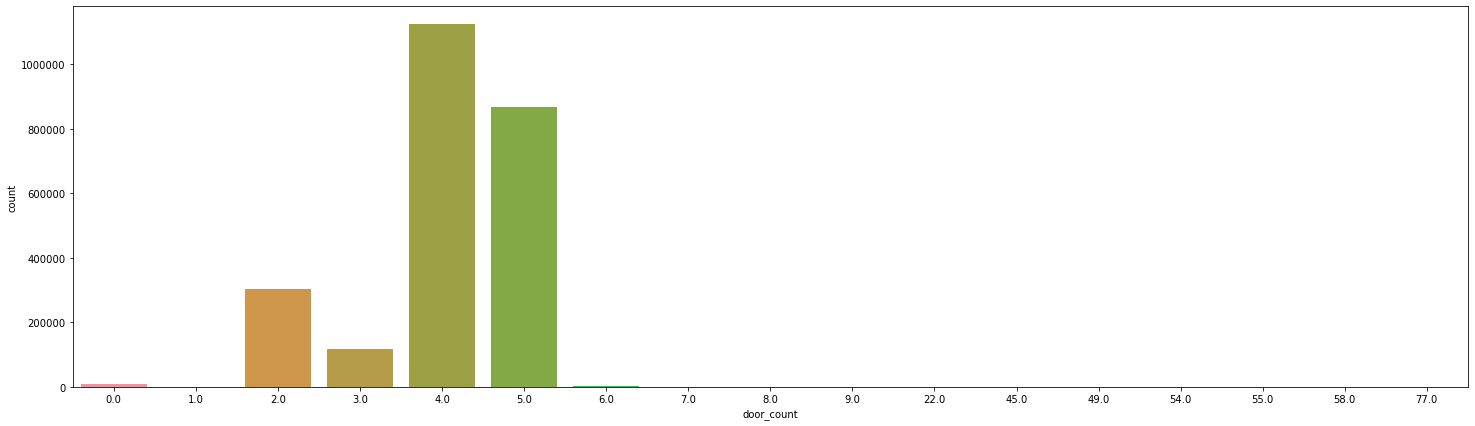

In [38]:
plt.figure(figsize=(25,7))
sns.countplot(car['door_count'])

In [39]:
car = car[(car['door_count'] >= 1) & (car['door_count'] <= 6)]

In [40]:
car['door_count'].isnull().sum()

0

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


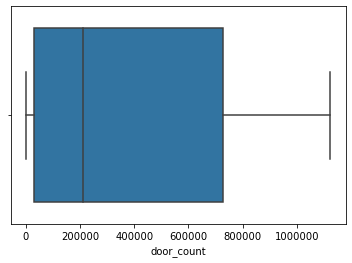

In [41]:
sns.boxplot(car['door_count'].value_counts())

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


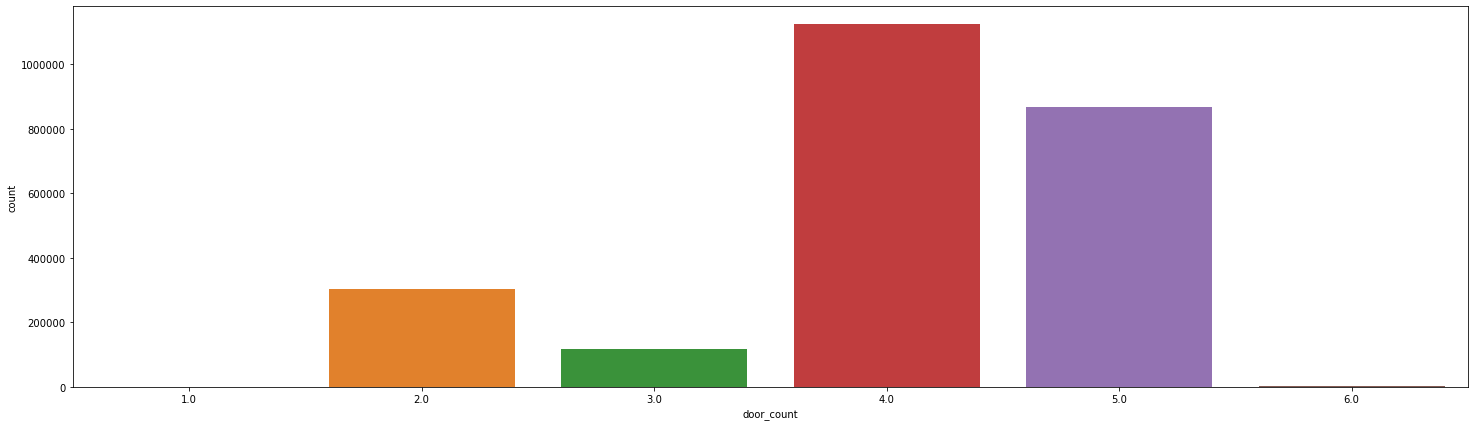

In [42]:
plt.figure(figsize=(25,7))
sns.countplot(car['door_count'])

## Seat Count Column

In [43]:
car['seat_count'].unique()

array(['7', '5', '4', 'None', '6', '9', '8', '2', '3', '18', '20', '10',
       '11', '15', '1', '16', '14', '50', '17', '74', '12', '65', '19',
       '54', '13', '27', '45', '56', '22', '255', '23', '24', '25', nan,
       5.0, 3.0, 4.0, 2.0, 7.0, 8.0, 6.0, 9.0, 1.0, 15.0, 14.0, 13.0,
       17.0, 12.0, 20.0, 10.0, 11.0, 18.0, 27.0, 56.0, 58.0, 30.0, 45.0,
       19.0, 55.0, 21.0, 54.0, 24.0, 16.0, 57.0, 74.0, 0.0, 51.0, 29.0,
       36.0, 52.0, 32.0, 44.0, 50.0, 512.0, 515.0, 33.0, 59.0, 85.0,
       517.0, 81.0, 43.0, 49.0], dtype=object)

In [44]:
car['seat_count'].replace('None', np.nan, inplace=True)
car['seat_count'] = car['seat_count'].astype('float')

In [45]:
car['seat_count'].unique()

array([  7.,   5.,   4.,  nan,   6.,   9.,   8.,   2.,   3.,  18.,  20.,
        10.,  11.,  15.,   1.,  16.,  14.,  50.,  17.,  74.,  12.,  65.,
        19.,  54.,  13.,  27.,  45.,  56.,  22., 255.,  23.,  24.,  25.,
        58.,  30.,  55.,  21.,  57.,   0.,  51.,  29.,  36.,  52.,  32.,
        44., 512., 515.,  33.,  59.,  85., 517.,  81.,  43.,  49.])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


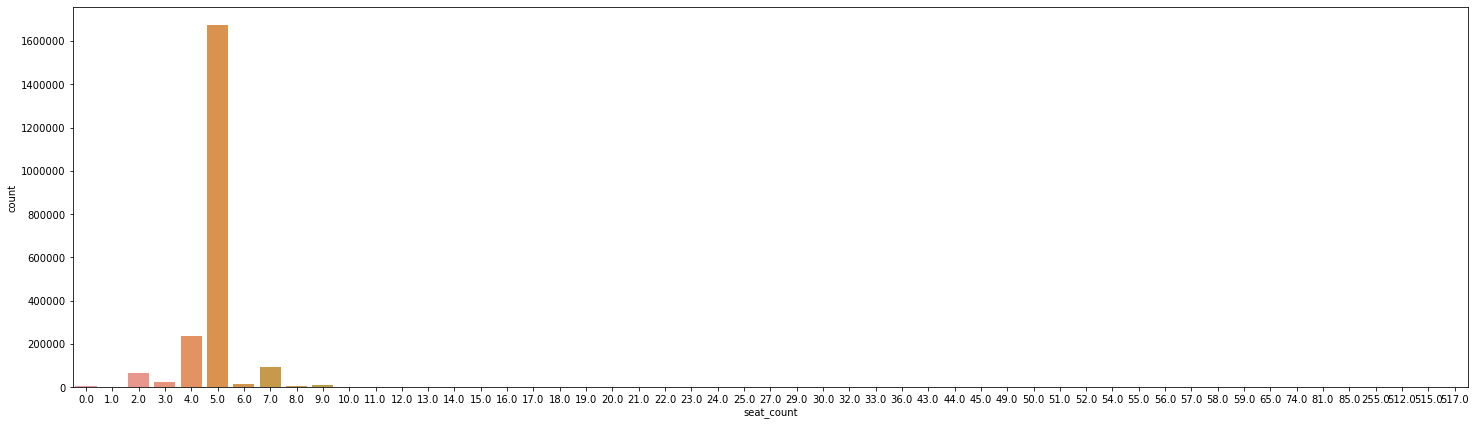

In [46]:
plt.figure(figsize=(25,7))
sns.countplot(car['seat_count'])

In [47]:
car = car[(car['seat_count'] >=1) & (car['seat_count'] < 10)]

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


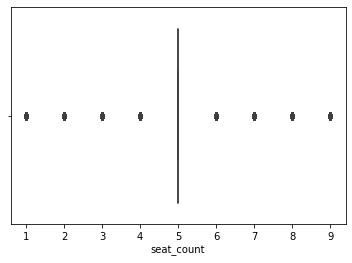

In [48]:
sns.boxplot(car['seat_count'])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


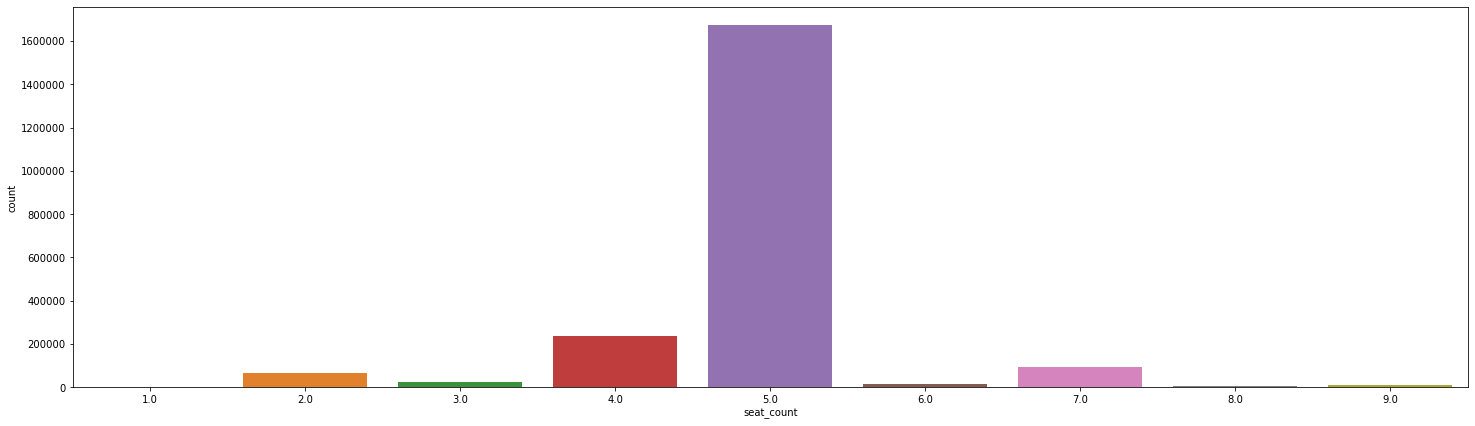

In [49]:
plt.figure(figsize=(25,7))
sns.countplot(car['seat_count'])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


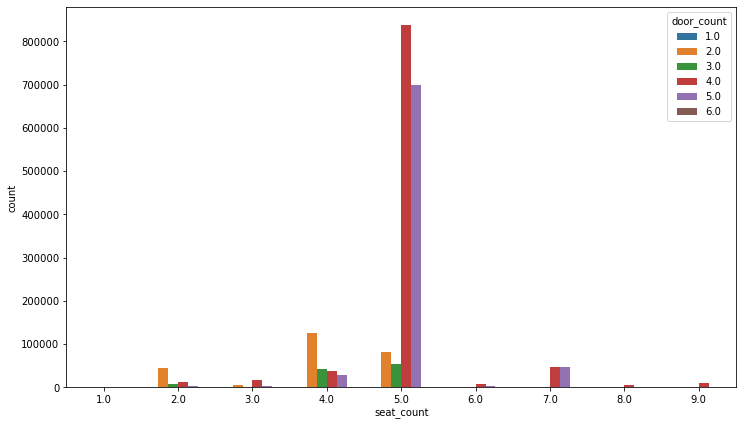

In [50]:
plt.figure(figsize=(12,7))
sns.countplot(car['seat_count'],hue=car['door_count'])

## Mileage Column

In [51]:
car['mileage'].dropna(inplace=True)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


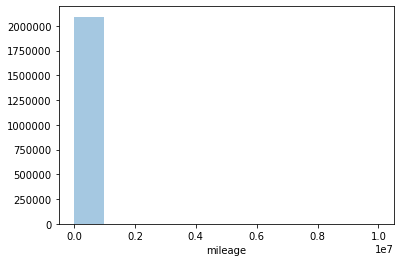

In [52]:
sns.distplot(car['mileage'],kde=False,bins=10)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


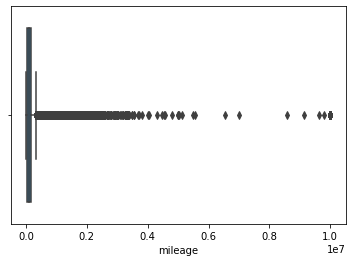

In [53]:
sns.boxplot(car['mileage'])

In [54]:
car = car[car['mileage']  > 20]
car['mileage'].value_counts()

100.0       10134
150000.0    10097
50.0         8392
200000.0     7863
100000.0     7761
            ...  
343964.0        1
343948.0        1
343937.0        1
343934.0        1
32212.0         1
Name: mileage, Length: 223038, dtype: int64

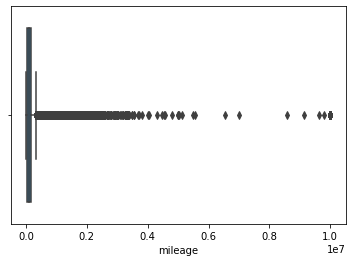

In [55]:
sns.boxplot(x=car['mileage'])

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'transmission vs mileage')

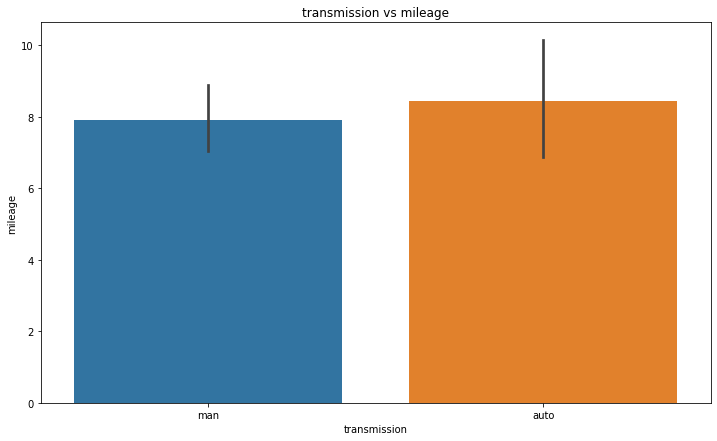

In [56]:
plt.figure(figsize=(12,7))
sns.barplot(car['transmission'],car['mileage'].value_counts())
plt.title('transmission vs mileage')

## Manufacture Year Column

In [57]:
car['manufacture_year'].dropna(inplace=True)

In [58]:
car['manufacture_year'].value_counts()

2015.0    242768
2012.0    175009
2011.0    156954
2014.0    129442
2013.0    111221
           ...  
1914.0         1
1911.0         1
1944.0         1
1942.0         1
1015.0         1
Name: manufacture_year, Length: 101, dtype: int64

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


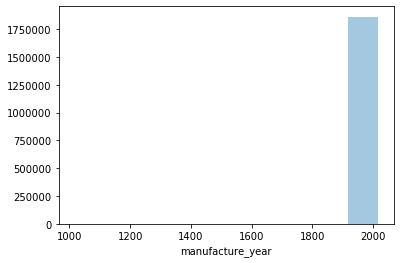

In [59]:
sns.distplot(car['manufacture_year'],kde=False,bins=10)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


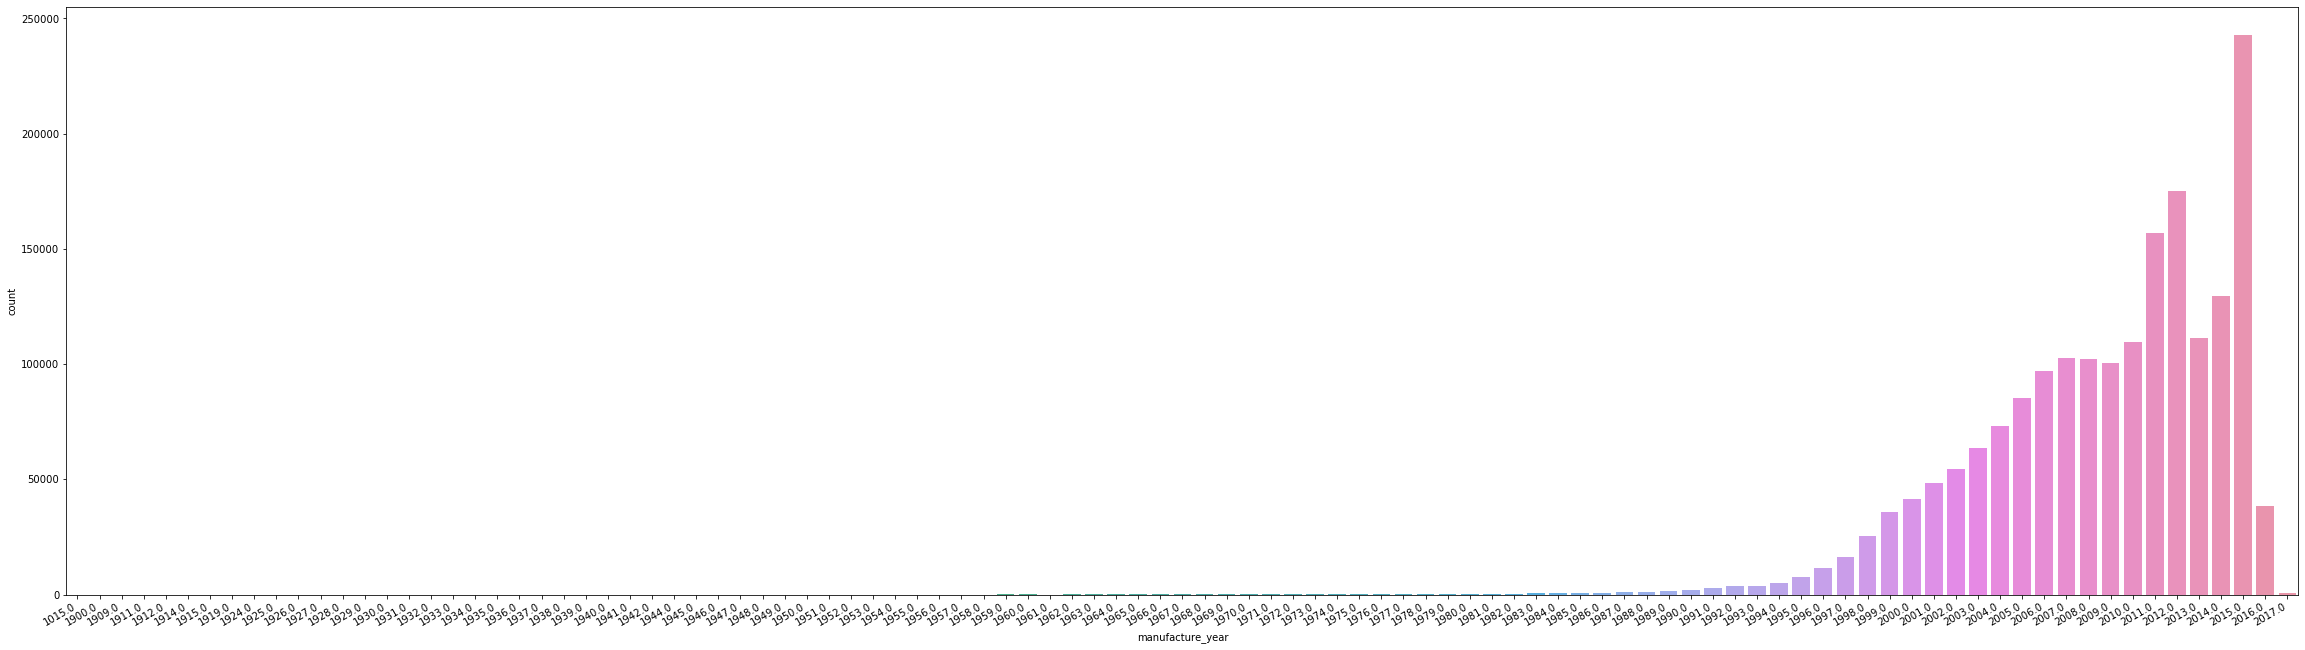

In [60]:
plt.figure(figsize=(40,12))
sns.countplot(car['manufacture_year'])
plt.gcf().autofmt_xdate()

In [61]:
car = car[car['manufacture_year'] >= 1990]

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


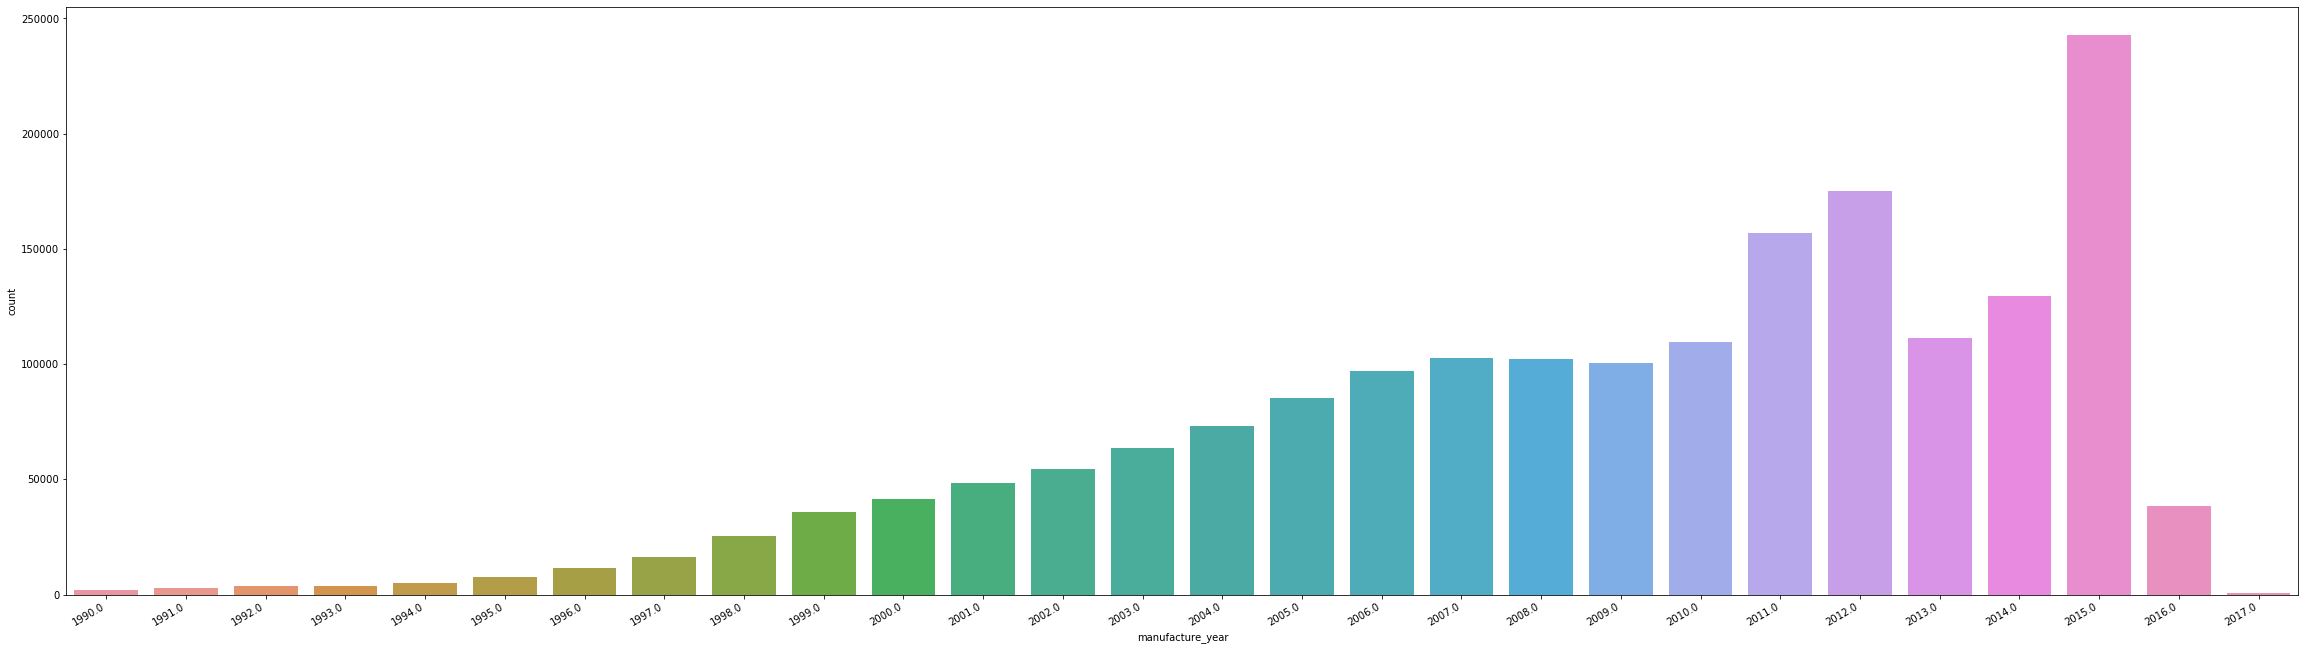

In [62]:
plt.figure(figsize=(40,12))
sns.countplot(car['manufacture_year'])
plt.gcf().autofmt_xdate()

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


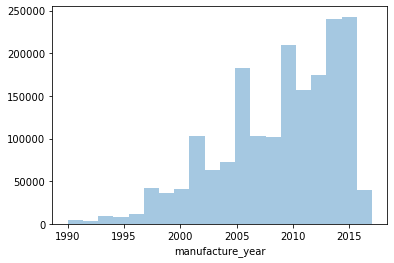

In [63]:
sns.distplot(car['manufacture_year'],kde=False,bins=20)

## Engine Displacement Column

In [64]:
car['engine_displacement'].value_counts()

1968.0    163743
1598.0    155790
1995.0     87434
1390.0     54810
1896.0     53756
           ...  
2238.0         1
2227.0         1
2220.0         1
2207.0         1
8227.0         1
Name: engine_displacement, Length: 2030, dtype: int64

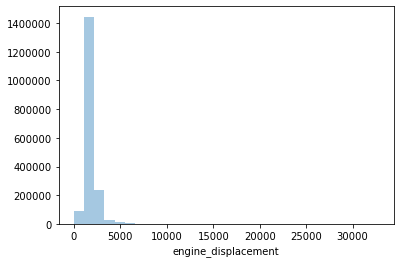

In [65]:
sns.distplot(car['engine_displacement'],kde=False,bins=30)

In [66]:
car = car[car['engine_displacement'] <= 6500]

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


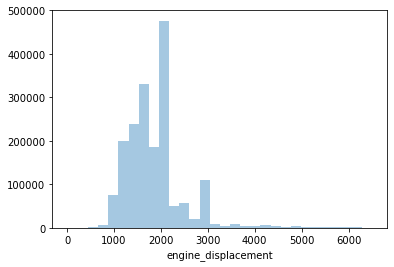

In [67]:
sns.distplot(car['engine_displacement'],kde=False,bins=30)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'manaufacture_year vs engine displacement')

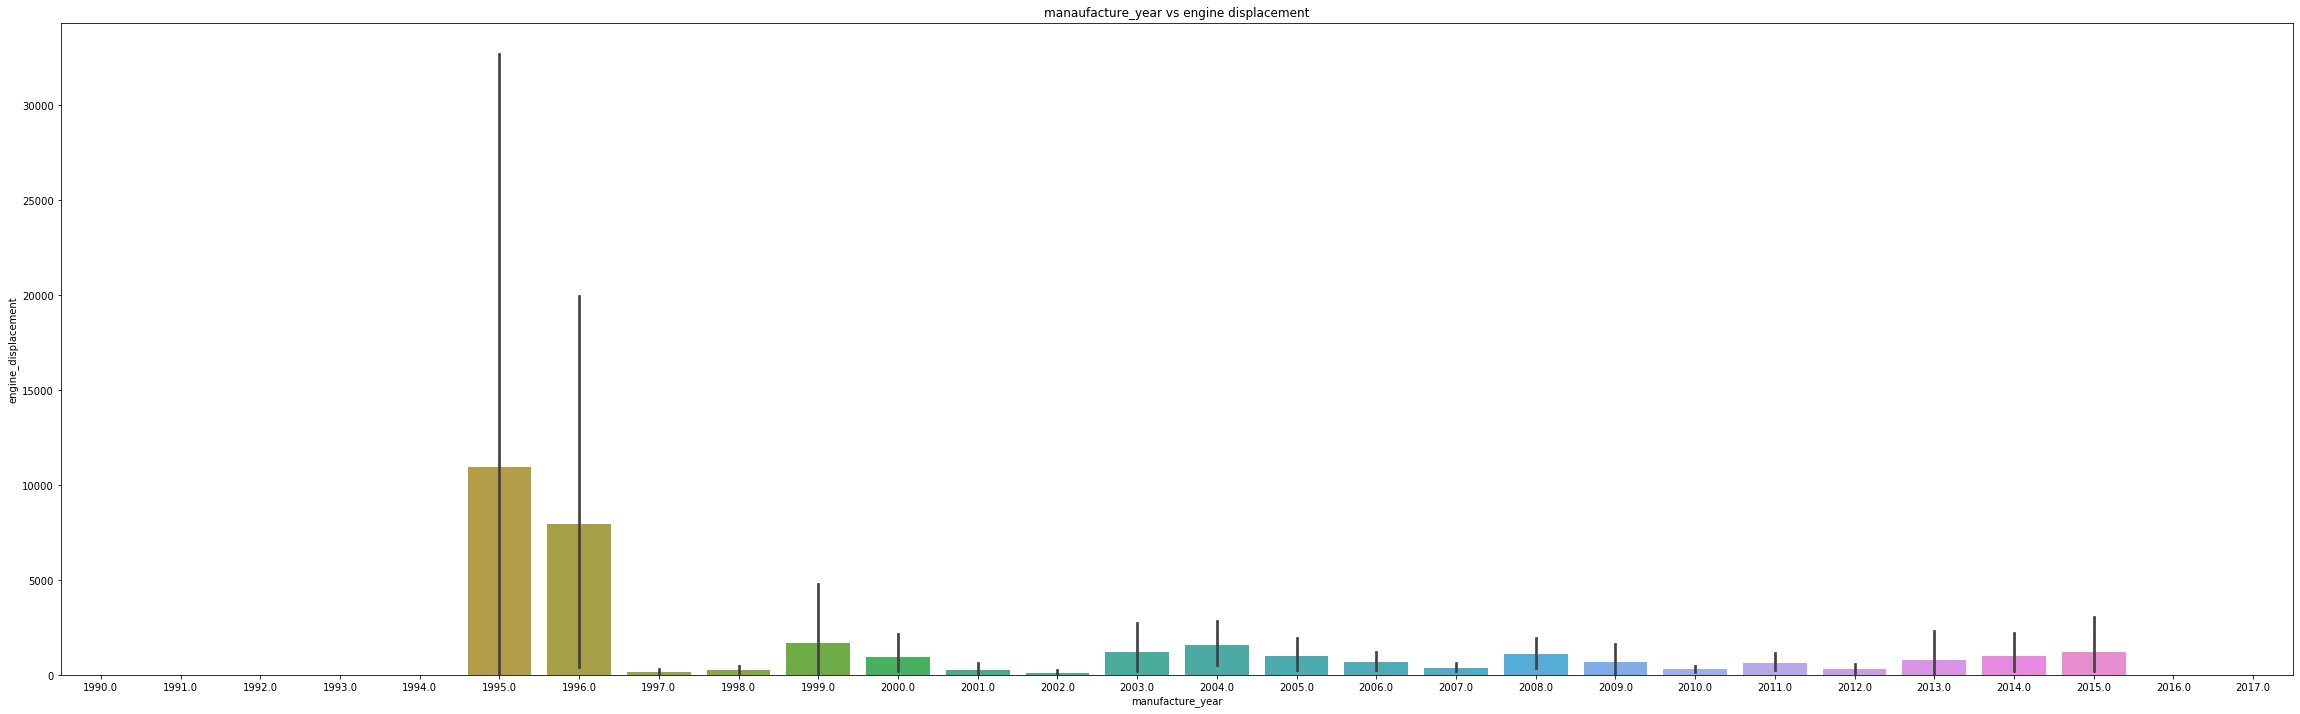

In [68]:
plt.figure(figsize=(40,12))
sns.barplot(car['manufacture_year'],car['engine_displacement'].value_counts())
plt.title('manaufacture_year vs engine displacement')

## Engine Power Column

In [69]:
car['engine_power'].value_counts()

103.0    114638
77.0      97704
110.0     94437
55.0      76894
66.0      72168
          ...  
870.0         1
470.0         1
919.0         1
920.0         1
511.0         1
Name: engine_power, Length: 536, dtype: int64

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


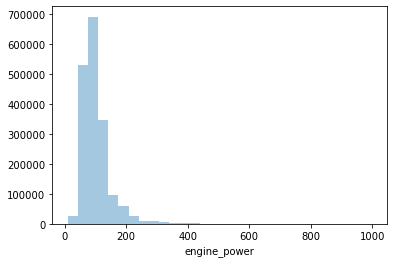

In [70]:
sns.distplot(car['engine_power'],kde=False,bins=30)

In [71]:
car = car[car['engine_power'] <= 400]

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


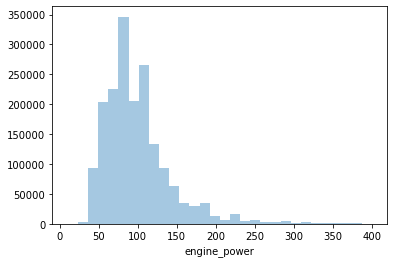

In [72]:
sns.distplot(car['engine_power'],kde=False,bins=30)

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Transmission vs Engine Displacement')

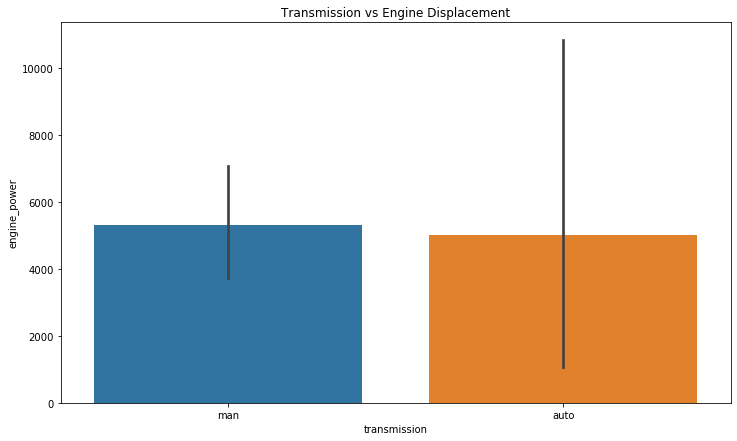

In [73]:
plt.figure(figsize=(12,7))
sns.barplot(car['transmission'],car['engine_power'].value_counts())
plt.title('Transmission vs Engine Displacement')

## Price Eur Column

In [74]:
car['price_eur'].value_counts()

1295.34     226169
10900.00      5563
12900.00      5298
9900.00       5182
11900.00      4962
             ...  
36383.38         1
18855.14         1
38333.00         1
38336.00         1
8192.00          1
Name: price_eur, Length: 139199, dtype: int64

In [75]:
car = car[car['price_eur'] > 1500]

C:\Users\Khushee\AppData\Local\Continuum\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


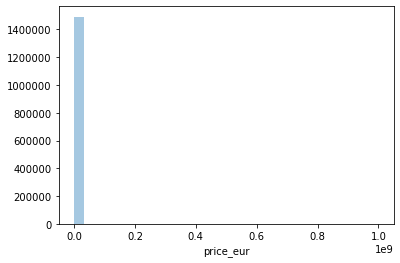

In [76]:
sns.distplot(car['price_eur'],kde=False,bins=30)

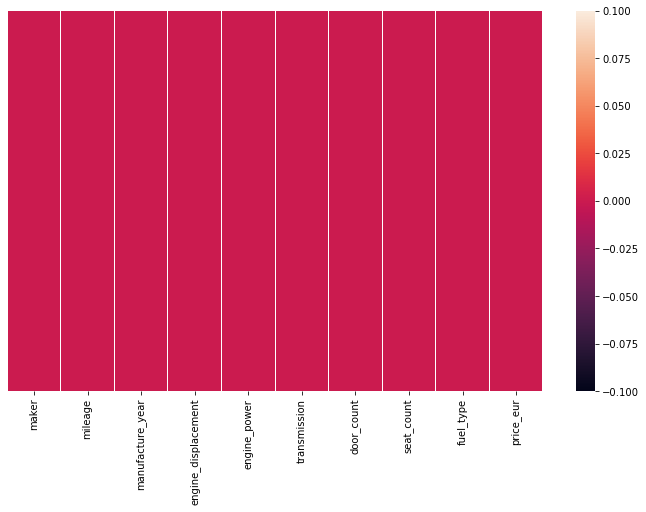

In [77]:
plt.figure(figsize=(12,7))
sns.heatmap(car.isnull(),yticklabels=False)

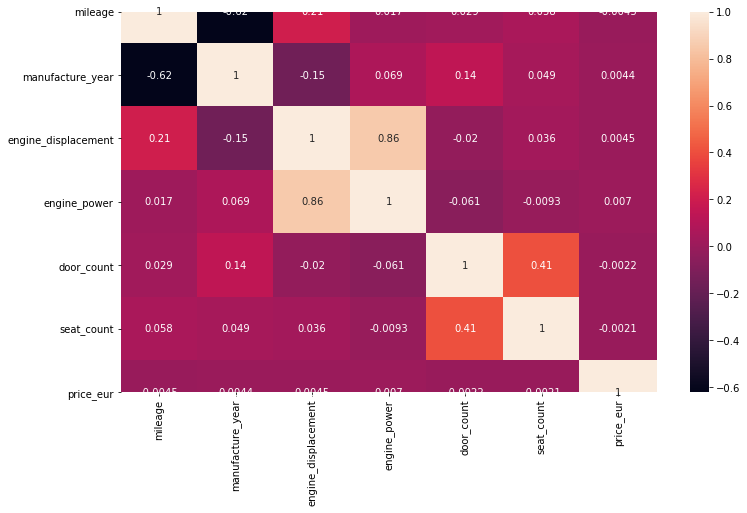

In [80]:
plt.figure(figsize=(12,7))
corr = car.corr()
sns.heatmap(corr, annot=True)